In [134]:
import os
import scipy.io as sio
import numpy as np
import glob
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.plugins.hparams import api as hp

In [135]:
%load_ext tensorboard
#os.system("rm -rf ./logs/")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [136]:
root = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3"
imglabel_map = os.path.join(root, 'imagelabels.mat')
setid_map = os.path.join(root, 'setid.mat')
imagelabels = sio.loadmat(imglabel_map)['labels'][0]
setids = sio.loadmat(setid_map)
ids = np.concatenate([setids['trnid'][0], setids['valid'][0],setids['tstid'][0]])
labels = []
image_paths = []
for i in ids:
    labels.append(int(imagelabels[i-1])-1)
    image_paths.append( os.path.join(root,"102flowers", 'jpg', 'image_{:05d}.jpg'.format(i)))


## select SEED

In [137]:
random.seed(1)
path="/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1"
output_path = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1/output"

In [138]:
random.seed(2)
path="/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2"
output_path = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2/output"

## train test splits

In [139]:
indexs = [i for i in range(len(labels))]
random.shuffle(indexs)
train_indexes = indexs[0:int(0.5*len(labels))]
validation_indexes = indexs[int(0.5*len(labels)):int(0.75*len(labels))]
test_indexes = indexs[int(0.75*len(labels)):]

### suniti check

In [140]:
train_indexes

[42,
 1102,
 6381,
 4536,
 7105,
 5281,
 3611,
 7921,
 7289,
 451,
 2294,
 2573,
 264,
 3569,
 4122,
 6196,
 7253,
 2972,
 5903,
 2684,
 5610,
 6165,
 2894,
 7617,
 6216,
 1336,
 3362,
 3146,
 5427,
 4053,
 4356,
 3773,
 7543,
 2261,
 1776,
 2425,
 5969,
 2800,
 7085,
 6058,
 6893,
 4331,
 7461,
 6063,
 4574,
 7147,
 2275,
 6691,
 6200,
 6695,
 7621,
 8085,
 7422,
 7748,
 7573,
 5993,
 2325,
 354,
 5258,
 360,
 3556,
 865,
 3188,
 1906,
 530,
 289,
 2073,
 7266,
 3784,
 2699,
 2407,
 3690,
 3916,
 6917,
 3696,
 2430,
 1219,
 3943,
 2644,
 5408,
 3161,
 5713,
 1224,
 1450,
 376,
 2106,
 3142,
 4449,
 2690,
 6721,
 4934,
 4219,
 1932,
 2580,
 6489,
 6362,
 186,
 6916,
 1042,
 1265,
 3425,
 6755,
 6451,
 4707,
 8009,
 3717,
 1182,
 6007,
 4071,
 7323,
 4227,
 2297,
 4169,
 6559,
 6014,
 6735,
 4766,
 1477,
 392,
 523,
 5643,
 1868,
 7301,
 1166,
 1804,
 7889,
 3451,
 4980,
 2643,
 1894,
 4647,
 591,
 5565,
 7657,
 2868,
 2514,
 5591,
 7930,
 1293,
 6431,
 7925,
 7587,
 3147,
 6377,
 1503,

In [141]:
image_classification = pd.DataFrame([image_paths,labels],index=["image_paths","labels"]).T
image_classification

,image_paths,labels
0,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
1,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
2,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
3,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
4,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,0
...,...,...
8184,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101
8185,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101
8186,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101
8187,/home/oem/PycharmProjects/lemida_hisuvit/ex3/e...,101


In [142]:
train_labels = list(image_classification.loc[train_indexes,"labels"])
train_image_paths = list(image_classification.loc[train_indexes,"image_paths"])

validation_labels = list(image_classification.loc[validation_indexes,"labels"])
validation_image_paths = list(image_classification.loc[validation_indexes,"image_paths"])

test_labels = list(image_classification.loc[test_indexes,"labels"])
test_image_paths = list(image_classification.loc[test_indexes,"image_paths"])

In [143]:
# get the input and output path
input_path = "/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/102flowers/jpg"
# get the class label limit
class_limit = 102
class_names =[i for i in range(0,class_limit)]



In [144]:
train_dir=os.path.join(path,"train")
validation_dir=os.path.join(path,"validation")
test_dir=os.path.join(path,"test")

## creating folders for each seed

In [109]:

# loop over the class labels
for label in class_names:
    label_path = os.path.join(path,"train", str(label))
    if not os.path.isdir(label_path):
        # create a folder for that class
        os.system("mkdir " +label_path)
for label in class_names:
    label_path=os.path.join(path,"validation", str(label))
    if not os.path.isdir(label_path):
        # create a folder for that class
        os.system("mkdir " +label_path)
for label in class_names:
    label_path=os.path.join(path,"test", str(label))
    if not os.path.isdir(label_path):
        # create a folder for that class
        os.system("mkdir " +label_path)
        
labels = train_labels
image_paths = train_image_paths
for i,label in enumerate(labels):
    cur_path=os.path.join(path,"train", str(label))
    os.system("cp " + image_paths[i] + " " +cur_path )
labels = validation_labels
image_paths = validation_image_paths
for i,label in enumerate(labels):
    cur_path=os.path.join(path,"validation", str(label))
    os.system("cp " + image_paths[i] + " " +cur_path )
labels = test_labels
image_paths = test_image_paths
for i,label in enumerate(labels):
    cur_path=os.path.join(path,"test", str(label))
    os.system("cp " + image_paths[i] + " " +cur_path )

# the transfer learning
## get train

In [145]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)


Found 4094 files belonging to 102 classes.


In [146]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


Found 2047 files belonging to 102 classes.


In [147]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)


Found 2048 files belonging to 102 classes.


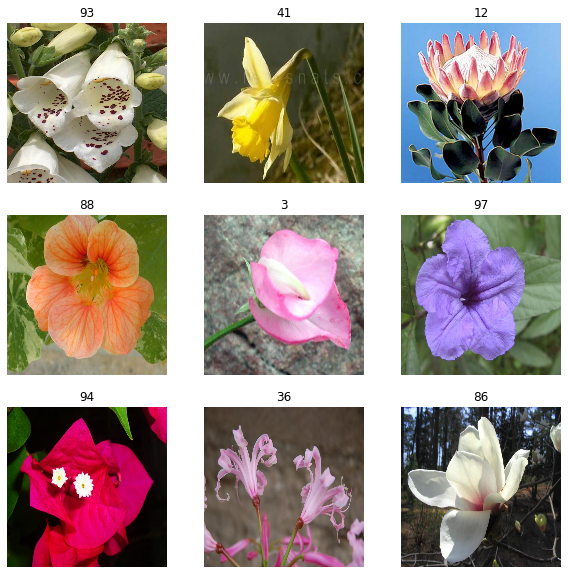

In [148]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [149]:
train_batches = tf.data.experimental.cardinality(train_dataset)
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_batches = tf.data.experimental.cardinality(test_dataset)
train_dataset = train_dataset.take(train_batches)
val_dataset = validation_dataset.take(val_batches)
test_dataset = test_dataset.take(test_batches)



In [150]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of train batches: 128
Number of validation batches: 64
Number of test batches: 64


In [151]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [152]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15))
])

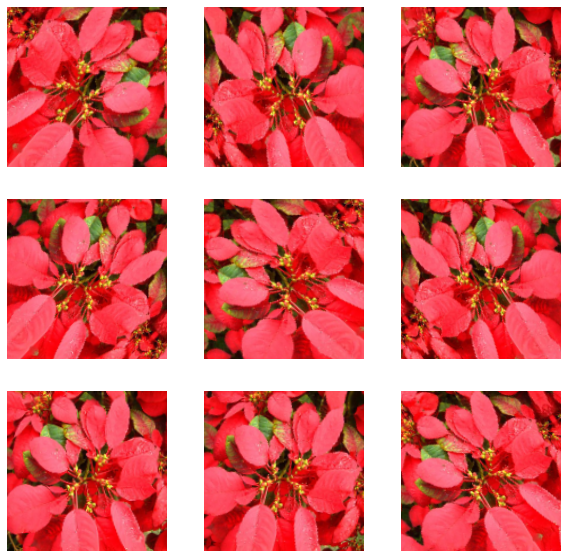

In [153]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

## preprocecing for mobilenet v2

בעוד רגע תוריד את tf.keras.applications.MobileNetV2 לשימוש כדגם הבסיס שלך. מודל זה מצפה לערכי פיקסלים ב- [-1, 1] , אך בשלב זה, ערכי הפיקסלים בתמונות שלך הם ב- [0, 255] . כדי לשנות את קנה המידה שלהם, השתמש בשיטת העיבוד המקדים הכלולה במודל.

In [154]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [155]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [156]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 512)


In [157]:
base_model.trainable = False

In [158]:
#base_model.summary()

In [159]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [160]:
prediction_layer = tf.keras.layers.Dense(class_limit,activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 102)


## hyper parameters tuning

In [161]:
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1, 0.2,0.3]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([0.001, 0.0005, 0.0001]))

In [162]:
with tf.summary.create_file_writer(output_path+'/logs/hparam_tuning_vgg16').as_default():
  hp.hparams_config(
    hparams=[HP_DROPOUT, HP_OPTIMIZER,HP_LEARNING_RATE],
    metrics=[hp.Metric('accuracy', display_name='Accuracy')],
  )

In [163]:
def train_test_model(hparams):
    tf.keras.backend.clear_session()
    inputs = tf.keras.Input(shape=(160, 160, 3))
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(hparams[HP_DROPOUT])(x)
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)

    for ix, layer in enumerate(model.layers):
        if hasattr(model.layers[ix], 'kernel_initializer') and \
                hasattr(model.layers[ix], 'bias_initializer'):
            weight_initializer = model.layers[ix].kernel_initializer
            bias_initializer = model.layers[ix].bias_initializer

            old_weights, old_biases = model.layers[ix].get_weights()

            model.layers[ix].set_weights([
                weight_initializer(shape=old_weights.shape),
                bias_initializer(shape=old_biases.shape)])

    learning_rate = hparams[HP_LEARNING_RATE]
    optimizer = hparams[HP_OPTIMIZER]
    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate*10)
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    initial_epochs = 18
    loss0, accuracy0 = model.evaluate(validation_dataset)
    print("initial loss: {:.2f}".format(loss0))
    print("initial accuracy: {:.2f}".format(accuracy0))
    model.fit(train_dataset,
                      use_multiprocessing=True,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)
    _, accuracy = model.evaluate(validation_dataset)

    return accuracy


In [164]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar('accuracy', accuracy, step=1)

In [165]:
session_num = 0
for learning_rate in  HP_LEARNING_RATE.domain.values:
    for dropout_rate in HP_DROPOUT.domain.values:
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
            HP_DROPOUT: dropout_rate,
            HP_OPTIMIZER: optimizer,
            HP_LEARNING_RATE: learning_rate,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run(output_path+'/logs/hparam_tuning_vgg16/' + run_name, hparams)
            session_num += 1

--- Starting trial: run-0
{'dropout': 0.1, 'optimizer': 'adam', 'learning_rate': 0.0001}


/home/oem/miniconda3/envs/lab_projects/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


64/64 [==============================] - 3s 36ms/step - loss: 4.9678 - accuracy: 0.0171
initial loss: 4.97
initial accuracy: 0.02
Epoch 1/18
128/128 [==============================] - 8s 58ms/step - loss: 3.7621 - accuracy: 0.1944 - val_loss: 2.7834 - val_accuracy: 0.4333
Epoch 2/18
128/128 [==============================] - 7s 57ms/step - loss: 2.3001 - accuracy: 0.4917 - val_loss: 1.9170 - val_accuracy: 0.5696
Epoch 3/18
128/128 [==============================] - 7s 57ms/step - loss: 1.6144 - accuracy: 0.6461 - val_loss: 1.5055 - val_accuracy: 0.6492
Epoch 4/18
128/128 [==============================] - 8s 57ms/step - loss: 1.2182 - accuracy: 0.7220 - val_loss: 1.2405 - val_accuracy: 0.7103
Epoch 5/18
128/128 [==============================] - 8s 58ms/step - loss: 1.0019 - accuracy: 0.7665 - val_loss: 1.1462 - val_accuracy: 0.7103
Epoch 6/18
128/128 [==============================] - 8s 58ms/step - loss: 0.8389 - accuracy: 0.8131 - val_loss: 1.0669 - val_accuracy: 0.7279
Epoch 7/18
1

In [168]:
print(output_path)#check if the plus is ok their
%tensorboard --logdir /home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2/output/logs/hparam_tuning_vgg16

/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed2/output


Launching TensorBoard...

## make the model

In [78]:
base_learning_rate = 0.0005
dropout_rate = 0.2
optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate)

In [79]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
outputs = prediction_layer(x)
#outputs = tf.cast(outputs, tf.int64)
#outputs = tf.one_hot(outputs, class_limit)
model = tf.keras.Model(inputs, outputs)



In [80]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0   

In [82]:
len(model.trainable_variables)

4

In [83]:
initial_epochs = 18

loss0, accuracy0 = model.evaluate(validation_dataset)


/home/oem/miniconda3/envs/lab_projects/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


64/64 [==============================] - 3s 34ms/step - loss: 4.9727 - accuracy: 0.0078


In [84]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


initial loss: 4.97
initial accuracy: 0.01


In [85]:
history = model.fit(train_dataset,
                    use_multiprocessing=True,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/18
128/128 [==============================] - 8s 58ms/step - loss: 3.3124 - accuracy: 0.2716 - val_loss: 2.1809 - val_accuracy: 0.4905
Epoch 2/18
128/128 [==============================] - 7s 56ms/step - loss: 1.7673 - accuracy: 0.5735 - val_loss: 1.4745 - val_accuracy: 0.6194
Epoch 3/18
128/128 [==============================] - 7s 57ms/step - loss: 1.2102 - accuracy: 0.6844 - val_loss: 1.1697 - val_accuracy: 0.6927
Epoch 4/18
128/128 [==============================] - 8s 58ms/step - loss: 0.9653 - accuracy: 0.7430 - val_loss: 1.0477 - val_accuracy: 0.7113
Epoch 5/18
128/128 [==============================] - 8s 58ms/step - loss: 0.7666 - accuracy: 0.7931 - val_loss: 0.9932 - val_accuracy: 0.7279
Epoch 6/18
128/128 [==============================] - 8s 58ms/step - loss: 0.6489 - accuracy: 0.8224 - val_loss: 0.9109 - val_accuracy: 0.7543
Epoch 7/18
128/128 [==============================] - 8s 58ms/step - loss: 0.5640 - accuracy: 0.8483 - val_loss: 0.9137 - val_accuracy: 0.7489

In [86]:
def acurecy_and_cross_entropy_fig(history,path_to_save):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Sparse Cross Entropy')
   # plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.savefig(path_to_save)
    plt.show()
    return acc,val_acc,loss,val_loss

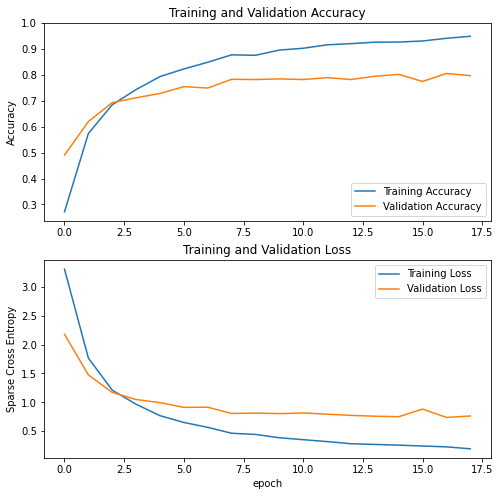

In [87]:
acc,val_acc,loss,val_loss = acurecy_and_cross_entropy_fig(history,os.path.join(output_path,"Training and Validation Loss and Accuracy with vgg 16.png"))

## fine tuninig of the base moodle

In [88]:
base_model.trainable = True


In [89]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [90]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [91]:
#model.summary()


In [92]:
len(model.trainable_variables)

4

In [93]:
fine_tune_epochs = 18
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                        use_multiprocessing=True,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 18/36
128/128 [==============================] - 10s 71ms/step - loss: 0.1315 - accuracy: 0.9641 - val_loss: 0.6890 - val_accuracy: 0.8139
Epoch 19/36
128/128 [==============================] - 9s 72ms/step - loss: 0.1134 - accuracy: 0.9700 - val_loss: 0.6827 - val_accuracy: 0.8153
Epoch 20/36
128/128 [==============================] - 9s 70ms/step - loss: 0.1125 - accuracy: 0.9695 - val_loss: 0.6789 - val_accuracy: 0.8188
Epoch 21/36
128/128 [==============================] - 9s 69ms/step - loss: 0.1050 - accuracy: 0.9714 - val_loss: 0.6730 - val_accuracy: 0.8212
Epoch 22/36
128/128 [==============================] - 9s 69ms/step - loss: 0.1144 - accuracy: 0.9695 - val_loss: 0.6707 - val_accuracy: 0.8188
Epoch 23/36
128/128 [==============================] - 9s 70ms/step - loss: 0.1050 - accuracy: 0.9731 - val_loss: 0.6699 - val_accuracy: 0.8207
Epoch 24/36
128/128 [==============================] - 10s 73ms/step - loss: 0.1065 - accuracy: 0.9756 - val_loss: 0.6821 - val_accurac

In [94]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

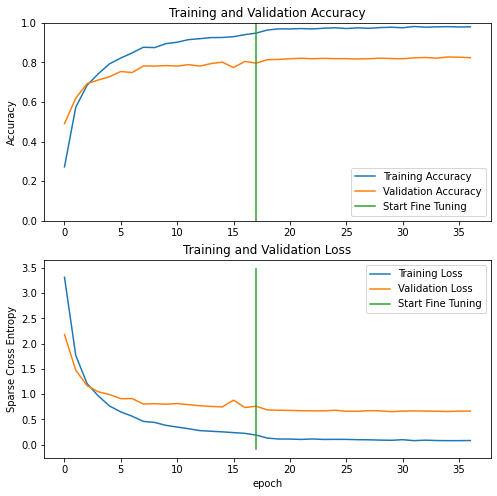

In [95]:
def acurecy_and_cross_entropy_fig_after_fine_tuning(acc,val_acc,loss,val_loss,path_to_save):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.ylim([0, 1])
    plt.plot([initial_epochs-1,initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    #plt.ylim([0, 1.0])
    plt.plot([initial_epochs-1,initial_epochs-1],
             plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('Sparse Cross Entropy')
    plt.savefig(path_to_save)
    plt.show()
acurecy_and_cross_entropy_fig_after_fine_tuning(acc,val_acc,loss,val_loss,os.path.join(output_path,"Training and Validation Loss and Accuracy After Fine Tuning with vgg 16.png"))

In [96]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

64/64 [==============================] - 3s 44ms/step - loss: 0.6824 - accuracy: 0.8286
Test accuracy : 0.82861328125


In [97]:
output_path

'/home/oem/PycharmProjects/lemida_hisuvit/ex3/ex3/seed1/output'